1. Import libraries

In [19]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import scipy
import sklearn as sk
import statsmodels.api as sm

In [16]:
import seaborn as sns
sns.set()

# Stats Model

2. Load the data

In [4]:
data = pd.read_csv('linear.csv')

In [5]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


SAT -> critical reading + Mathematics + writing
GPA -> Grade point average (at graduation from university)

Q. why would i predict GPA with SAT?
A. 1. The sat is considered one of the best estimators of intellectual capacity and capability.
2. Almost all colleges acrss the USA are using the SAT as a proxy for admission.
3. The SAT stood the test of time.

In [6]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [7]:
# Define the dependent and independent variables
y = data['GPA']
x1 = data['SAT']

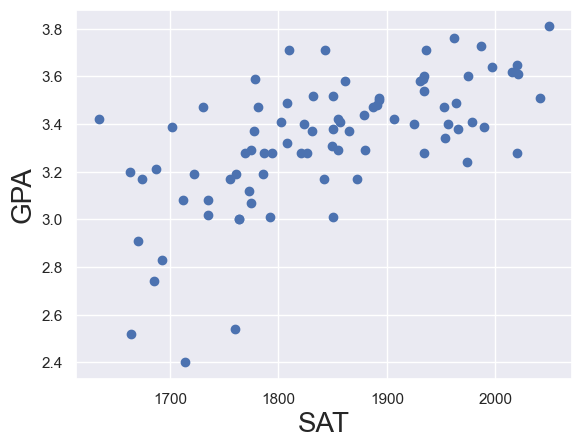

In [17]:
# Explore the data
plt.scatter(x1, y)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

# ordinary least square regression

<a href="https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html">Statsmodel OLS</a>


In [14]:
# linear regression
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           7.20e-11
Time:                        08:54:21   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

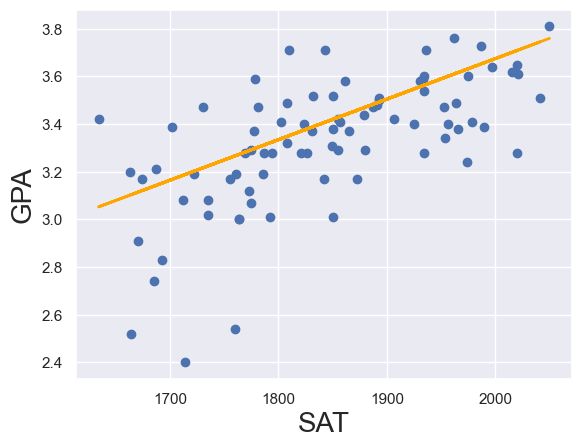

In [18]:
# plotting regression line
plt.scatter(x1, y)
yhat = 0.0017*x1 +0.275
fig = plt.plot(x1, yhat, lw=2, c='orange', label='regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

# Scikit- Learn

In [30]:
from sklearn.linear_model import LinearRegression

1. Load Data

In [20]:
data = pd.read_csv('linear.csv')

2. Regression model

Declaring dependent and independent Variables

In [21]:
x = data['SAT']  #input feature -> 1-Dimensional data
y = data['GPA'] #output feature

In [32]:
# reshapping the input feature into the 2D matrix for the error 
x_matrix = x.values.reshape(84,1) # 2-dimensional

In [42]:
print("shape of the input features: ", x_matrix.shape)
print("type of the the input features :", type(x_matrix))

shape of the input features:  (84, 1)
type of the the input features : <class 'numpy.ndarray'>


In [27]:
print("shape of the input features: ", x.shape)
print("type of the the input features :", type(x))

shape of the input features:  (84,)
type of the the input features : <class 'pandas.core.series.Series'>


In [28]:
print("shape of the output features: ", y.shape)
print("type of the the output features :", type(y))

shape of the output features:  (84,)
type of the the output features : <class 'pandas.core.series.Series'>


Regression Model

In [34]:
reg = LinearRegression()
reg.fit(x_matrix, y)
# to remove the error we have to reshape the input feature variables.

LinearRegression()

Standardization - the process of subtracting the mean and dividing by the standard deviation (a type of noramlization)

Normalization - hass different meaning depending on the case 
In the given case -> it means we subtract the mean but divide by the L2-norm of the inputs.

copy_x -> make a copy of the input feature
fit_intercept -> handles the constant 
n_jobs -> parallelize the jobs (cpu utilization)


#### R- Squared

In [36]:
reg.score(x_matrix, y)

0.40600391479679765

#### Coefficients

In [37]:
reg.coef_

array([0.00165569])

#### Intercept

In [38]:
reg.intercept_

0.2750402996602803

#### Making Predictions

In [46]:
x_test = [[1740]]
reg.predict(x_test)

array([3.15593751])

In [50]:
new_data = pd.DataFrame(data=[1740,1750], columns =['SAT'])
new_data

,SAT
0,1740
1,1750


In [52]:
new_data['Predicted_GPA'] = reg.predict(new_data)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [53]:
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1750,3.172494


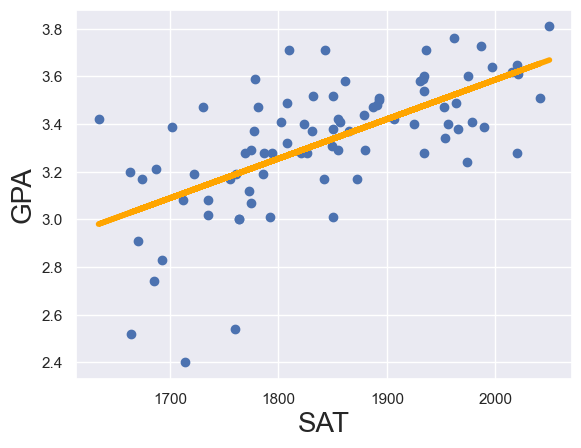

In [55]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
fig = plt.plot(x, yhat, lw=4, c='orange', label="regression line")
plt.xlabel('SAT', fontsize =20)
plt.ylabel('GPA', fontsize = 20)
plt.show()